LAH ÌÉêÏßÄ (Ï∂ï ÌÉêÏßÄ) Î≥ÄÏàò Ï∂îÍ∞Ä
Í∏∞ÌÉÄ Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ï Î∞è Îã§Î•∏ Î™®Îç∏ÎßÅ Î∞©Î≤ïÎ°† Ï∂îÍ∞Ä


In [2]:
# pip install biosppy nolds scikit-learn peakutils

In [1]:
import wfdb
import numpy as np
import pandas as pd
import glob
import os
from wfdb import rdrecord
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from scipy import signal, fft
from scipy.signal import spectrogram
from biosppy.signals.ecg import christov_segmenter, hamilton_segmenter
from nolds import sampen
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import pywt
import wfdb
from wfdb.processing import gqrs_detect
from scipy.signal import butter, filtfilt, welch, find_peaks
from scipy.stats import entropy
from multiprocessing import Pool, cpu_count
from sklearn.impute import SimpleImputer
import time
import scipy.ndimage
from scipy.stats import skew, kurtosis
from tqdm import tqdm
from math import atan2, degrees

2025-04-03 15:35:27.117331: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 15:35:27.118574: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 15:35:27.122649: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 15:35:27.132915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743694527.149541     941 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743694527.15

### Ìï®Ïàò Ï†ïÏùò

In [3]:
!pip install EMD-signal

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.6/75.6 kB 24.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82.1/82.1 kB 26.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 119.4/119.4 kB 43.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 52.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56.8/56.8 kB 24.2 MB/s eta 0:00:00


### Preprocessing

In [43]:
import numpy as np
import pandas as pd
import pywt
import scipy.ndimage
from scipy.signal import butter, filtfilt, welch, find_peaks, savgol_filter
from wfdb.processing import gqrs_detect
from tqdm import tqdm
import time
from PyEMD import EMD


# Í∏∞Ï°¥ Ï†ÑÏ≤òÎ¶¨ ÏΩîÎìú Ïú†ÏßÄ Î∞è Ï∂îÍ∞ÄÎêú Ï†ÑÏ≤òÎ¶¨ (EMD baseline removal Î∞è Savitzky-Golay smoothing)
def preprocess_ecg(signal_data, fs=400, use_bandpass=True, use_emd=False, use_savgol=True):
    def apply_bandpass(x):
        nyq = 0.5 * fs
        b, a = butter(4, [0.1 / nyq, 45 / nyq], btype='band')
        return filtfilt(b, a, x)

    def wavelet_denoise(signal, wavelet='db6', level=4):
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        threshold = np.median(np.abs(coeffs[-1])) / 0.6745
        coeffs[1:] = [pywt.threshold(c, threshold, mode='soft') for c in coeffs[1:]]
        return pywt.waverec(coeffs, wavelet)

    def oc_co_filter(signal, fs, k_factor):
        k_size = int(np.round(k_factor * fs))
        struct_elem = np.ones(k_size)
        opened = scipy.ndimage.grey_opening(signal, structure=struct_elem)
        closed = scipy.ndimage.grey_closing(opened, structure=struct_elem)
        return scipy.ndimage.grey_opening(closed, structure=struct_elem)

    def emd_baseline_removal(signal):
        emd = EMD()
        IMFs = emd.emd(signal)
        if IMFs.shape[0] > 1:
            return signal - IMFs[-1]  # Í∞ÄÏû• ÎÇÆÏùÄ Ï£ºÌååÏàòÏùò IMF Ï†úÍ±∞
        return signal

    def savgol_smoothing(signal, window_length=31, polyorder=3):
        return savgol_filter(signal, window_length, polyorder)

    if signal_data.ndim == 2:
        # ÎÇ¥Î∂Ä Ìï®ÏàòÍ∞Ä Ïô∏Î∂Ä Î≥ÄÏàòÏóê Ï†ëÍ∑ºÌï† Ïàò ÏûàÍ≤åÎÅî ÏúÑÏóêÏÑú Ï†ïÏùò
        def process_channel(x):
            if use_bandpass:
                x = apply_bandpass(x)
            x = wavelet_denoise(x)
            if use_emd:
                x = emd_baseline_removal(x)
            baseline = oc_co_filter(x, fs, 0.27)
            x = x - baseline
            if use_savgol:
                x = savgol_smoothing(x)
            return x
    
        # Î≥ëÎ†¨ Ï≤òÎ¶¨Î°ú Î™®Îì† Î¶¨ÎìúÏóê ÎåÄÌï¥ Ï†ÑÏ≤òÎ¶¨
        cleaned = np.array(
            Parallel(n_jobs=4)(
                delayed(process_channel)(signal_data[:, i]) for i in range(signal_data.shape[1])
            )
        ).T  # Transpose to shape (time, channel)
    
        return cleaned

    else:
        x = signal_data

        if use_bandpass:
            x = apply_bandpass(x)
        x = wavelet_denoise(x)
        
        if use_emd:
            x = emd_baseline_removal(x)

        baseline = oc_co_filter(x, fs, 0.27)
        x = x - baseline

        if use_savgol:
            x = savgol_smoothing(x)

        return x


Ï†ÑÏ≤òÎ¶¨ Ï†ÑÌõÑ ÏãúÍ∞ÅÌôîÌï¥Î≥¥Í∏∞ (Ï≤´Î≤àÏß∏ ÏÉòÌîåÎßå)

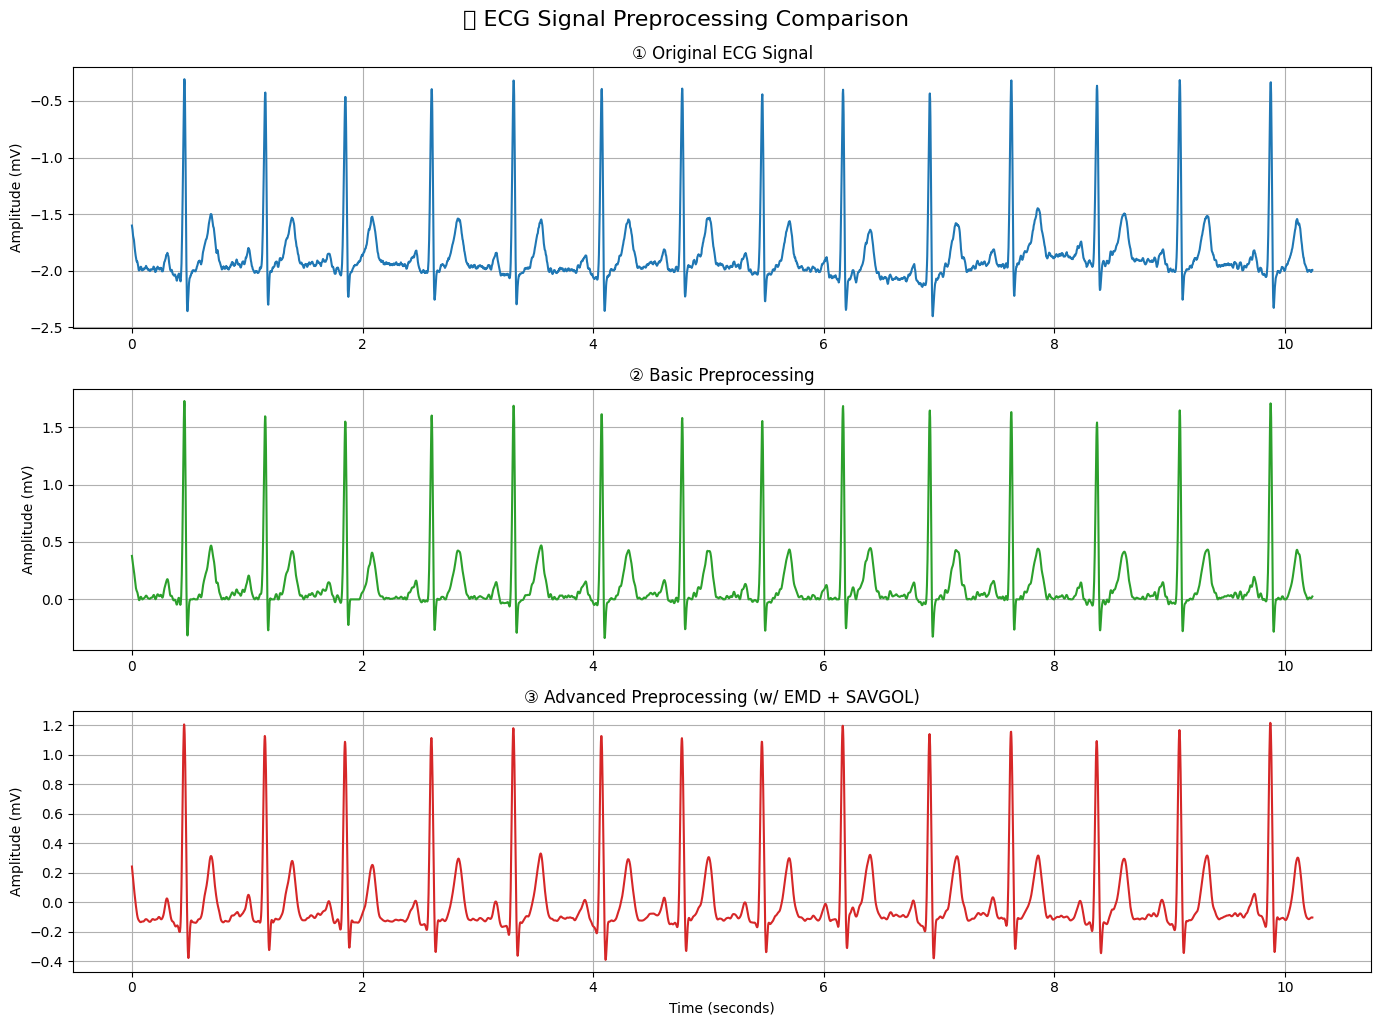

In [11]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from PyEMD import EMD

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Î™®ÎìàÏùÄ Ïù¥ÎØ∏ Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï

def compare_preprocessing_versions(signal_data, fs=400, lead_index=0, use_bandpass=True, window_length=25, polyorder=3):
    """
    ECG Ïã†Ìò∏ Ï†ÑÏ≤òÎ¶¨ 3Îã®Í≥Ñ ÎπÑÍµê ÏãúÍ∞ÅÌôî Ìï®Ïàò
    1. ÏõêÎ≥∏ Ïã†Ìò∏
    2. Î∞¥ÎìúÌå®Ïä§ + Ïõ®Ïù¥Î∏îÎ¶ø + OC_CO
    3. 2Î≤à + EMD + SAVGOL Ï∂îÍ∞Ä
    """

    # ‚úÖ 1. Original
    original = signal_data[:, lead_index]

    # ‚úÖ 2. Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨ (Î∞¥ÎìúÌå®Ïä§ + Ïõ®Ïù¥Î∏îÎ¶ø + OC_CO)
    def basic_pipeline(x):
        if use_bandpass:
            nyq = 0.5 * fs
            b, a = butter(4, [0.1 / nyq, 45 / nyq], btype='band')
            x = filtfilt(b, a, x)
        x = wavelet_denoise(x)
        baseline = oc_co_filter(x, fs, 0.27)
        return x - baseline

    basic = basic_pipeline(original.copy())

    # ‚úÖ 3. EMD + SAVGOL Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨
    def advanced_pipeline(x):
        x = basic_pipeline(x)
        emd = EMD()
        IMFs = emd.emd(x)
        if IMFs.shape[0] > 1:
            x = x - IMFs[-1]
        x = savgol_filter(x, window_length=window_length, polyorder=polyorder)
        return x

    advanced = advanced_pipeline(original.copy())

    # ‚úÖ Plotting
    time_axis = np.arange(len(original)) / fs
    plt.figure(figsize=(14, 10))

    plt.subplot(3, 1, 1)
    plt.plot(time_axis, original, label='Original Signal')
    plt.title("‚ë† Original ECG Signal")
    plt.ylabel("Amplitude (mV)")
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(time_axis, basic, label='Basic Preprocessing (Bandpass + Wavelet + OC_CO)', color='tab:green')
    plt.title("‚ë° Basic Preprocessing")
    plt.ylabel("Amplitude (mV)")
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(time_axis, advanced, label='Advanced (Basic + EMD + SAVGOL)', color='tab:red')
    plt.title("‚ë¢ Advanced Preprocessing (w/ EMD + SAVGOL)")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude (mV)")
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle("üîç ECG Signal Preprocessing Comparison", fontsize=16, y=1.02)
    plt.show()
# ÏòàÏãú: ECG ÌïòÎÇò ÎΩëÏïÑÏÑú ÎπÑÍµê
sample_signal = df_part0["p_signal"].iloc[0]  # ÎòêÎäî df.sample(1)["p_signal"].values[0]
compare_preprocessing_versions(sample_signal, fs=400, lead_index=0)

## Feature extraction

In [44]:
import numpy as np
import pandas as pd
from scipy.stats import entropy, skew, kurtosis
from scipy.signal import find_peaks, welch
import pywt
from wfdb.processing import gqrs_detect
from tqdm import tqdm
import time

# R ÌîºÌÅ¨Î•º Í≤ÄÏ∂úÌïòÎäî Ìï®Ïàò
def detect_r_peaks(ecg_signal, fs=400):
    """
    ECG Ïã†Ìò∏ÏóêÏÑú gqrs ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ïù¥Ïö©ÌïòÏó¨ R ÌîºÌÅ¨Î•º Í≤ÄÏ∂úÌï®.
    
    Parameters:
        ecg_signal (array): ÏûÖÎ†• ECG Ïã†Ìò∏
        fs (int): ÏÉòÌîåÎßÅ Ï£ºÌååÏàò (Í∏∞Î≥∏Í∞í: 400 Hz)
    
    Returns:
        np.array: Í≤ÄÏ∂úÎêú R ÌîºÌÅ¨Ïùò Ïù∏Îç±Ïä§ Î∞∞Ïó¥ (ÌîºÌÅ¨Í∞Ä 2Í∞ú ÎØ∏ÎßåÏù¥Î©¥ Îπà Î∞∞Ïó¥ Î∞òÌôò)
    """
    r_peaks = gqrs_detect(sig=ecg_signal, fs=fs)
    return r_peaks if len(r_peaks) > 1 else np.array([])

# QRS Ìè≠ Î∞è QT Í∞ÑÍ≤©ÏùÑ Î∂ÑÏÑùÌïòÎäî Ìï®Ïàò
def analyze_qrs_qt(ecg_signal, r_peaks, fs=400):
    """
    ECG Ïã†Ìò∏ÏóêÏÑú QRS Ìè≠Í≥º QT Í∞ÑÍ≤©ÏùÑ Ï∂îÏ†ïÌï®.
    
    Parameters:
        ecg_signal (array): ÏûÖÎ†• ECG Ïã†Ìò∏
        r_peaks (array): Í≤ÄÏ∂úÎêú R ÌîºÌÅ¨ Ïù∏Îç±Ïä§
        fs (int): ÏÉòÌîåÎßÅ Ï£ºÌååÏàò (Í∏∞Î≥∏Í∞í: 400 Hz)
    
    Returns:
        dict: ÌèâÍ∑† QRS Ìè≠Í≥º QT Í∞ÑÍ≤© (Ï∏°Ï†ïÍ∞íÏù¥ ÏóÜÏúºÎ©¥ np.nan)
    """
    if len(r_peaks) < 2:
        return {'qrs_width': np.nan, 'qt_interval': np.nan}
    qrs_widths = np.diff(r_peaks) / fs
    qt_intervals = []
    for r in r_peaks:
        if r + int(0.5 * fs) < len(ecg_signal):
            segment = ecg_signal[r:r + int(0.5 * fs)]
            peaks, _ = find_peaks(-segment)
            if len(peaks) > 0:
                qt_intervals.append((peaks[-1]) / fs)
    return {
        'qrs_width': np.nanmean(qrs_widths),
        'qt_interval': np.nanmean(qt_intervals) if qt_intervals else np.nan
    }

# Ïã¨Î∞ïÎ≥ÄÏù¥ÎèÑ(Heart Rate Variability, HRV) Î∂ÑÏÑù Ìï®Ïàò
def hrv_analysis(r_peaks, fs=400):
    """
    R ÌîºÌÅ¨Î•º Í∏∞Î∞òÏúºÎ°ú HRV Í¥ÄÎ†® ÏßÄÌëúÎì§ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    
    Parameters:
        r_peaks (array): Í≤ÄÏ∂úÎêú R ÌîºÌÅ¨ Ïù∏Îç±Ïä§
        fs (int): ÏÉòÌîåÎßÅ Ï£ºÌååÏàò (Í∏∞Î≥∏Í∞í: 400 Hz)
    
    Returns:
        dict: RMSSD, SDNN, SD1, SD2, SD ÎπÑÏú®, ÌèâÍ∑† Ïã¨Î∞ïÏàò(BPM)
    """
    if len(r_peaks) < 2:
        return {
            'rmssd': np.nan,
            'sdnn': np.nan,
            'sd1': np.nan, 
            'sd2': np.nan,
            'sd_ratio': np.nan,
            'heart_rate_mean': np.nan
        }
    rr_intervals = np.diff(r_peaks) / fs
    diff_rr = np.diff(rr_intervals)
    heart_rate = 60 / rr_intervals  # BPM
    return {
        'rmssd': np.sqrt(np.mean(diff_rr**2)),
        'sdnn': np.std(rr_intervals),
        'sd1': np.std(diff_rr) / np.sqrt(2),
        'sd2': np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2),
        'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) / (np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)),
        'heart_rate_mean': np.mean(heart_rate)
    }

# Ï£ºÌååÏàò Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÌååÏõå Ïä§ÌéôÌä∏Îüº ÎπÑÏú® Í≥ÑÏÇ∞ Ìï®Ïàò
def frequency_analysis(ecg_signal, fs=400):
    """
    Welch Î∞©Î≤ïÏùÑ Ïù¥Ïö©Ìï¥ ECG Ïã†Ìò∏Ïùò ÌååÏõå Ïä§ÌéôÌä∏ÎüºÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥†,
    Í∞Å Ï£ºÌååÏàò ÎåÄÏó≠(ULF, VLF, LF, HF)Ïùò ÏóêÎÑàÏßÄ ÎπÑÏú®ÏùÑ Íµ¨Ìï©ÎãàÎã§.
    
    Parameters:
        ecg_signal (array): ÏûÖÎ†• ECG Ïã†Ìò∏
        fs (int): ÏÉòÌîåÎßÅ Ï£ºÌååÏàò (Í∏∞Î≥∏Í∞í: 400 Hz)
    
    Returns:
        dict: Í∞Å Ï£ºÌååÏàò ÎåÄÏó≠Ïùò ÏóêÎÑàÏßÄ ÎπÑÏú®
    """
    freqs, power = welch(ecg_signal, fs=fs, nperseg=256)
    bands = {'ulf': (0.003, 0.04), 'vlf': (0.04, 0.15), 'lf': (0.04, 0.15), 'hf': (0.15, 0.4)}
    total_energy = np.sum(power)
    band_energy = {band: np.sum(power[(freqs >= low) & (freqs < high)]) 
                   for band, (low, high) in bands.items()}
    return {k: v / total_energy if total_energy > 0 else 0 for k, v in band_energy.items()}

# Ïõ®Ïù¥Î∏îÎ¶ø Î≥ÄÌôò Í∏∞Î∞ò ÌîºÏ≤ò Ï∂îÏ∂ú Ìï®Ïàò
def extract_wavelet_features(ecg_signal, wavelet='db4', level=4):
    """
    Ïõ®Ïù¥Î∏îÎ¶ø Î≥ÄÌôòÏùÑ ÌÜµÌï¥ ECG Ïã†Ìò∏Ïùò ÌÜµÍ≥ÑÏ†Å ÌîºÏ≤ò(ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏóêÎÑàÏßÄ, ÏóêÎÑàÏßÄ ÎπÑÏú®, ÏóîÌä∏Î°úÌîº)Î•º Ï∂îÏ∂úÌï©ÎãàÎã§.
    
    Parameters:
        ecg_signal (array): ÏûÖÎ†• ECG Ïã†Ìò∏
        wavelet (str): ÏÇ¨Ïö© Ïõ®Ïù¥Î∏îÎ¶ø Ï¢ÖÎ•ò (Í∏∞Î≥∏Í∞í: 'db4')
        level (int): Î∂ÑÌï¥ Î†àÎ≤® (Í∏∞Î≥∏Í∞í: 4)
    
    Returns:
        dict: Ïõ®Ïù¥Î∏îÎ¶ø Î†àÎ≤®Î≥Ñ ÌÜµÍ≥Ñ ÌîºÏ≤òÏôÄ ÌèâÍ∑† ÏóîÌä∏Î°úÌîº
    """
    coeffs = pywt.wavedec(ecg_signal, wavelet, level=level)
    features = {}
    total_energy = sum(np.sum(np.square(c)) for c in coeffs)
    entropies = [entropy(np.abs(c) / np.sum(np.abs(c)), base=2) if np.sum(np.abs(c)) > 0 else 0 for c in coeffs]
    for i, c in enumerate(coeffs):
        abs_c = np.abs(c)
        features[f'wavelet_L{i}_mean'] = np.mean(abs_c)
        features[f'wavelet_L{i}_std'] = np.std(c)
        features[f'wavelet_L{i}_energy'] = np.sum(np.square(c))
        features[f'wavelet_L{i}_energy_ratio'] = np.sum(np.square(c)) / total_energy if total_energy > 0 else 0
    features['wavelet_entropy'] = np.mean(entropies)
    return features

# Sample Entropy Í≥ÑÏÇ∞ Ìï®Ïàò
def sample_entropy(signal, m=2, r=0.2):
    """
    ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏÉòÌîå ÏóîÌä∏Î°úÌîºÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    
    Parameters:
        signal (array): ÏûÖÎ†• Ïã†Ìò∏
        m (int): ÏûÑÎ≤†Îî© Ï∞®Ïõê (Í∏∞Î≥∏Í∞í: 2)
        r (float): ÌóàÏö© Ïò§Ï∞® ÎπÑÏú® (Í∏∞Î≥∏Í∞í: 0.2, ÌëúÏ§ÄÌé∏Ï∞®Ïùò ÎπÑÏú®)
    
    Returns:
        float: ÏÉòÌîå ÏóîÌä∏Î°úÌîº Í∞í
    """
    N = len(signal)
    r *= np.std(signal)
    def _phi(m):
        x = np.array([signal[i:i + m] for i in range(N - m)])
        C = np.sum(np.max(np.abs(x[:, None] - x[None, :]), axis=2) < r, axis=0) - 1
        return np.sum(C) / (N - m)
    return -np.log(_phi(m + 1) / _phi(m)) if _phi(m) != 0 else np.nan

# Lempel-Ziv Î≥µÏû°ÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def lempel_ziv_complexity(signal):
    """
    Ïù¥ÏßÑ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌïú ÌõÑ Lempel-Ziv Î≥µÏû°ÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    
    Parameters:
        signal (array): ÏûÖÎ†• Ïã†Ìò∏
    
    Returns:
        int: Lempel-Ziv Î≥µÏû°ÎèÑ Í∞í
    """
    binary_seq = ''.join(['1' if s > 0 else '0' for s in signal])
    i, k, l = 0, 1, 1
    c = 1
    n = len(binary_seq)
    while True:
        if i + k == n:
            c += 1
            break
        if binary_seq[i:i + k] == binary_seq[l:l + k]:
            k += 1
        else:
            i += 1
            if i == l:
                c += 1
                l += k
                k = 1
                i = 0
        if l + k > n:
            c += 1
            break
    return c

# PR/RR/QRS/QT ÎπÑÏú® Í≥ÑÏÇ∞ Ìï®Ïàò
def temporal_morphology_ratios(features_dict):
    """
    Ï∂îÏ∂úÎêú ÌîºÏ≤òÎì§ÏùÑ Î∞îÌÉïÏúºÎ°ú QRS/QT Î∞è PR/RR ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    
    Parameters:
        features_dict (dict): ÌîºÏ≤ò ÎîïÏÖîÎÑàÎ¶¨ (qt_interval, qrs_width, heart_rate_mean Îì± Ìè¨Ìï®)
    
    Returns:
        dict: Í≥ÑÏÇ∞Îêú ÎπÑÏú® Í∞íÎì§
    """
    ratios = {}
    if 'qt_interval' in features_dict and 'qrs_width' in features_dict:
        qt = features_dict['qt_interval']
        qrs = features_dict['qrs_width']
        if qt and qt != 0:
            ratios['qrs_qt_ratio'] = qrs / qt
    if 'heart_rate_mean' in features_dict and features_dict['heart_rate_mean'] != 0 and 'qt_interval' in features_dict:
        qt = features_dict['qt_interval']
        rr = 60.0 / features_dict['heart_rate_mean']
        pr = qt * 0.25  # ÏûÑÏùò ÏÑ§Ï†ï (ÏÉòÌîåÏóê Îî∞Îùº Îã§Î¶Ñ), Ïã§Ï†ú PR Í≥ÑÏÇ∞ Ï∂îÍ∞Ä Í∞ÄÎä•
        ratios['pr_rr_ratio'] = pr / rr
    return ratios

# Ïã†Ìò∏ Î≥µÏû°ÎèÑ Î∞è ÌòïÌÉúÌïô ÌîºÏ≤òÎ•º Ï∂îÍ∞ÄÌïòÎäî Ìï®Ïàò
def add_morphological_complexity_features(signal, extracted_dict):
    """
    ÏûÖÎ†• Ïã†Ìò∏Ïùò ÏÉòÌîå ÏóîÌä∏Î°úÌîºÏôÄ Lempel-Ziv Î≥µÏû°ÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÌîºÏ≤ò ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.
    
    Parameters:
        signal (array): ÏûÖÎ†• Ïã†Ìò∏
        extracted_dict (dict): Í∏∞Ï°¥ ÌîºÏ≤ò ÎîïÏÖîÎÑàÎ¶¨
    
    Returns:
        dict: Î≥µÏû°ÎèÑ ÌîºÏ≤òÍ∞Ä Ï∂îÍ∞ÄÎêú ÎîïÏÖîÎÑàÎ¶¨
    """
    extracted_dict['sample_entropy'] = sample_entropy(signal)
    extracted_dict['lz_complexity'] = lempel_ziv_complexity(signal)
    return extracted_dict

# # ÌôïÏû•Îêú ÌîºÏ≤òÎ•º Ï∂îÏ∂úÌïòÎäî Ìï®Ïàò (preprocess_ecg Ìï®ÏàòÎäî Î≥ÑÎèÑ Ï†ïÏùòÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®)
# def extract_features(ecg_signal, fs=400):
#     """
#     ECG Ïã†Ìò∏ÏóêÏÑú QRS, HRV, Ï£ºÌååÏàò, Ïõ®Ïù¥Î∏îÎ¶ø Î∞è Î≥µÏû°ÎèÑ ÌîºÏ≤ò Îì± ÌôïÏû•Îêú ÌîºÏ≤òÎì§ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
#     (preprocess_ecg Ìï®ÏàòÍ∞Ä ÎØ∏Î¶¨ Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
    
#     Parameters:
#         ecg_signal (array): ÏûÖÎ†• ECG Ïã†Ìò∏
#         fs (int): ÏÉòÌîåÎßÅ Ï£ºÌååÏàò (Í∏∞Î≥∏Í∞í: 400 Hz)
    
#     Returns:
#         dict: Ï∂îÏ∂úÎêú Î™®Îì† ÌîºÏ≤òÎì§Ïùò ÎîïÏÖîÎÑàÎ¶¨
#     """
#     filtered = preprocess_ecg(ecg_signal, fs)
#     r_peaks = detect_r_peaks(filtered, fs)
    
#     basic = {
#         **analyze_qrs_qt(filtered, r_peaks, fs),
#         **hrv_analysis(r_peaks, fs),
#         **frequency_analysis(filtered, fs),
#         **extract_wavelet_features(filtered),
#         'skewness': skew(filtered),
#         'kurtosis': kurtosis(filtered)
#     }
#     ratios = temporal_morphology_ratios(basic)
#     complexity = add_morphological_complexity_features(filtered, {})
    
#     return {**basic, **ratios, **complexity}


def extract_features(ecg_signal, fs=400):
    """
    Îπ†Î•∏ Î≤ÑÏ†ÑÏùò ECG ÌîºÏ≤ò Ï∂îÏ∂ú Ìï®Ïàò (ÎäêÎ¶∞ Ìï≠Î™© Ï†úÍ±∞)
    """
    filtered = preprocess_ecg(ecg_signal, fs)
    r_peaks = detect_r_peaks(filtered, fs)

    # ÌïµÏã¨ ÌîºÏ≤òÎßå Ïú†ÏßÄ
    basic = {
        **analyze_qrs_qt(filtered, r_peaks, fs),
        **hrv_analysis(r_peaks, fs),
        **frequency_analysis(filtered, fs),
        **extract_wavelet_features(filtered, level=3),  # ÏÑ±Îä• Ï†ÄÌïò ÏóÜÏù¥ ÏÜçÎèÑ Í∞úÏÑ†
        'skewness': skew(filtered),
        'kurtosis': kurtosis(filtered)
    }

    # Î≥µÏû°ÎèÑ ÌîºÏ≤ò Ï†úÍ±∞
    # complexity = add_morphological_complexity_features(filtered, {})

    # ÏãúÍ∞Ñ-ÌòïÌÉú ÎπÑÏú®ÏùÄ Îß§Ïö∞ Í∞ÄÎ≥çÍ∏∞ ÎïåÎ¨∏Ïóê Ïú†ÏßÄ Í∞ÄÎä•
    ratios = temporal_morphology_ratios(basic)

    return {**basic, **ratios}




# DataFrameÏóê Ï†ÄÏû•Îêú ECG Ïã†Ìò∏Ïóê ÎåÄÌï¥ ÌôïÏû• ÌîºÏ≤òÎ•º Ï∂îÏ∂úÌïòÎäî Ìï®Ïàò
def process_with_progress(df, num_samples=None, fs=400, lead_index=0, include_metadata=True):
    """
    DataFrame ÎÇ¥ ECG Ïã†Ìò∏Ïóê ÎåÄÌï¥ ÌôïÏû• ÌîºÏ≤òÎ•º Ï∂îÏ∂úÌïòÎ©∞ ÏßÑÌñâ ÏÉÅÌô©ÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
    ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ Î∞è Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Ìè¨Ìï® Ïó¨Î∂ÄÎ•º ÏßÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
    
    Parameters:
        df (DataFrame): ECG Îç∞Ïù¥ÌÑ∞Î•º Ìè¨Ìï®ÌïòÎäî DataFrame (Ïª¨Îüº 'p_signal' Îì± Ìè¨Ìï®)
        num_samples (int, optional): Ï≤òÎ¶¨Ìï† ÏÉòÌîå Ïàò (NoneÏù¥Î©¥ Ï†ÑÏ≤¥ Ï≤òÎ¶¨)
        fs (int): ÏÉòÌîåÎßÅ Ï£ºÌååÏàò (Í∏∞Î≥∏Í∞í: 400 Hz)
        lead_index (int): ÏÇ¨Ïö©Ìï† lead Ïù∏Îç±Ïä§ (Í∏∞Î≥∏Í∞í: 0)
        include_metadata (bool): Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Ìè¨Ìï® Ïó¨Î∂Ä (Í∏∞Î≥∏Í∞í: True)
    
    Returns:
        DataFrame: Ï∂îÏ∂úÎêú ÌîºÏ≤òÏôÄ (ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú) Î©îÌÉÄÎç∞Ïù¥ÌÑ∞Í∞Ä Î≥ëÌï©Îêú DataFrame
    """
    start_time = time.time()
    df_sample = df.sample(n=num_samples, random_state=42).reset_index(drop=True) if num_samples else df.copy().reset_index(drop=True)
    all_rows = []

    for idx, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="ÌôïÏû• ÌäπÏßï Ï∂îÏ∂ú Ï§ë", dynamic_ncols=True):
        try:
            ecg_signal = row["p_signal"][:, lead_index]
            features = extract_features(ecg_signal, fs=fs)
            features = {f"{lead_index}_{k}": v for k, v in features.items()}
            if include_metadata:
                metadata = row.drop("p_signal").to_dict()
                metadata["Age_gap"] = metadata.get("Age", np.nan) - metadata.get("nn_predicted_age", np.nan)
                merged = {**features, **metadata}
            else:
                merged = {**features, "exam_id": row["exam_id"]}
            all_rows.append(merged)
        except Exception as e:
            print(f"Ïò§Î•ò Î∞úÏÉù: {e} (ÏÉòÌîå {idx} Í±¥ÎÑàÎúÄ)")
            continue

    df_features = pd.DataFrame(all_rows)
    df_features.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_features = df_features.dropna(axis=1, thresh=0.6 * len(df_features))
    print(f"\nÏ¥ù {len(df_features)}Í∞ú ÏÉòÌîå ÌîºÏ≤ò Ï∂îÏ∂ú ÏôÑÎ£å! (ÏÜåÏöîÏãúÍ∞Ñ: {time.time() - start_time:.2f}Ï¥à)")
    return df_features

In [ ]:

# QRS Î≤°ÌÑ∞ Î∞©Ìñ• Í≥ÑÏÇ∞

from scipy.signal import find_peaks

def detect_lah_angle(ecg_signal_2d, fs=400):
    """
    Lead I, Lead aVF Í∏∞Î∞ò ÌèâÍ∑† QRS angle Ï∂îÏ†ï (ÎèÑ Îã®ÏúÑ)
    ecg_signal_2d: (time, leads) ÌòïÌÉúÏùò 2D ECG Ïã†Ìò∏
    """
    try:
        lead_I = ecg_signal_2d[:, 0]
        lead_aVF = ecg_signal_2d[:, 5]  # aVF Î≥¥ÌÜµ 6Î≤àÏß∏ Î¶¨Îìú

        r_peaks = detect_r_peaks(lead_I, fs)
        qrs_vectors = []

        for r in r_peaks:
            if r + int(0.08 * fs) < len(lead_I):  # 80ms QRS window
                x = lead_I[r:r + int(0.08 * fs)].mean()
                y = lead_aVF[r:r + int(0.08 * fs)].mean()
                qrs_vectors.append((x, y))

        if not qrs_vectors:
            return {"qrs_angle_deg": np.nan}

        x_mean = np.mean([vec[0] for vec in qrs_vectors])
        y_mean = np.mean([vec[1] for vec in qrs_vectors])

        angle_rad = np.arctan2(y_mean, x_mean)
        angle_deg = np.degrees(angle_rad)
        return {"qrs_angle_deg": angle_deg}
    except Exception as e:
        print(f"‚ö†Ô∏è detect_lah_angle error: {e}")
        return {"qrs_angle_deg": np.nan}

def process_with_progress_lah_angle(df, num_samples=None, fs=400):
    """
    ECGÏóêÏÑú QRS angle Ï∂îÏ∂ú (Î¶¨Îìú I, aVF ÏÇ¨Ïö©)
    """
    start_time = time.time()
    if num_samples is None:
        df_sample = df.copy().reset_index(drop=True)
    else:
        df_sample = df.sample(n=num_samples, random_state=42).reset_index(drop=True)

    all_rows = []
    for idx, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="üî∏ QRS angle Ï∂îÏ∂ú", dynamic_ncols=True):
        try:
            signal = row["p_signal"]
            features = detect_lah_angle(signal, fs=fs)
            features["exam_id"] = row["exam_id"]  # Î≥ëÌï©Ïö©
            all_rows.append(features)
        except Exception as e:
            print(f"‚ö†Ô∏è Ïò§Î•ò: {e} (ÏÉòÌîå {idx} Í±¥ÎÑàÎúÄ)")
            continue

    df_angle = pd.DataFrame(all_rows)
    print(f"\n‚úÖ LAH QRS angle Ï∂îÏ∂ú ÏôÑÎ£å! (Ï¥ù {len(df_angle)}Í∞ú)")
    return df_angle



## code15 Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨

ÌîºÏ≤ò Ï∂îÏ∂ú (lead1: index0)

In [3]:
df_part0 = pd.read_pickle("/workspace/my_data/code15_part0.pkl")
df_part1 = pd.read_pickle("/workspace/my_data/code15_part1.pkl")

In [45]:
df0 = process_with_progress(df_part0, fs=400, lead_index=0, include_metadata=True)

/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value encountered in scalar divide                                                                | 552/19901 [00:17<09:37, 33.48it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) / (np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)),
/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value encountered in scalar divide                                                                | 604/19901 [00:18<10:00, 32.11it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) / (np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)),
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.                                                  | 608/19901 [00:19<09:46, 32.89it/s]
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.typ

Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 9172 Í±¥ÎÑàÎúÄ)


/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value encountered in scalar divide                                                               | 9282/19901 [04:40<05:30, 32.17it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) / (np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)),
/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: divide by zero encountered in scalar divide                                                              | 9294/19901 [04:40<05:44, 30.77it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) / (np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)),
/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value encountered in scalar divide                                                               | 9362/19901 [04:42<05:09, 34.10it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) / (np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)),
/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value encountered in scalar div

Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 13186 Í±¥ÎÑàÎúÄ)


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.‚ñà‚ñå                                              | 13248/19901 [06:40<03:26, 32.26it/s]
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value enco

Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 19102 Í±¥ÎÑàÎúÄ)


/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value encountered in scalar divide‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ     | 19177/19901 [09:39<00:20, 34.67it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) / (np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)),
/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value encountered in scalar divide‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà     | 19189/19901 [09:39<00:20, 34.12it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) / (np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)),
/tmp/ipykernel_941/897953255.py:82: RuntimeWarning: invalid value encountered in scalar divide‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà


Ï¥ù 19898Í∞ú ÏÉòÌîå ÌîºÏ≤ò Ï∂îÏ∂ú ÏôÑÎ£å! (ÏÜåÏöîÏãúÍ∞Ñ: 601.86Ï¥à)


In [47]:
df0.columns

Index(['0_qrs_width', '0_qt_interval', '0_rmssd', '0_sdnn', '0_sd1', '0_sd2',
       '0_sd_ratio', '0_heart_rate_mean', '0_ulf', '0_vlf', '0_lf', '0_hf',
       '0_wavelet_L0_mean', '0_wavelet_L0_std', '0_wavelet_L0_energy',
       '0_wavelet_L0_energy_ratio', '0_wavelet_L1_mean', '0_wavelet_L1_std',
       '0_wavelet_L1_energy', '0_wavelet_L1_energy_ratio', '0_wavelet_L2_mean',
       '0_wavelet_L2_std', '0_wavelet_L2_energy', '0_wavelet_L2_energy_ratio',
       '0_wavelet_L3_mean', '0_wavelet_L3_std', '0_wavelet_L3_energy',
       '0_wavelet_L3_energy_ratio', '0_wavelet_entropy', '0_skewness',
       '0_kurtosis', '0_qrs_qt_ratio', '0_pr_rr_ratio', 'exam_id', 'Age',
       'Chagas_label', 'is_male', 'nn_predicted_age', 'RBBB', 'LBBB', 'AF',
       'normal_ecg', 'Age_gap'],
      dtype='object')

In [ ]:
df1 = process_with_progress(df_part1, fs=400, lead_index=0, include_metadata=True)

In [13]:
# ÏÉàÎ°ú QRS Í∞ÅÎèÑÎßå Ï∂îÏ∂ú
df_angle = process_with_progress_lah_angle(df_part0)

# exam_id Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df = pd.merge(df0, df_angle, on="exam_id", how="inner")

üî∏ QRS angle Ï∂îÏ∂ú: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19901/19901 [07:30<00:00, 44.19it/s]


‚úÖ LAH QRS angle Ï∂îÏ∂ú ÏôÑÎ£å! (Ï¥ù 19901Í∞ú)


In [10]:
# ÏúÑÏïÑÎûòÎ°ú Ïù¥Ïñ¥ Î∂ôÏù¥Í∏∞ (row Î∞©Ìñ• concat)
df = pd.concat([df_part0, df_part1], axis=0).reset_index(drop=True)

# Í≤∞Í≥º ÌôïÏù∏
print(f"‚úÖ Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: {len(df)}")
df

‚úÖ Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: 39790


qrs_width  qt_interval     rmssd      sdnn       sd1       sd2  \
0       0.719375     0.477692  0.041100  0.024498  0.029040  0.020699   
1       1.089286     0.477500  0.182908  0.115540  0.128080  0.111161   
2       0.650000     0.482222  0.008073  0.007071  0.005428  0.005901   
3       0.936944     0.483750  0.023402  0.022104  0.016511  0.028401   
4       0.767813     0.481944  0.023299  0.027427  0.015110  0.030081   
...          ...          ...       ...       ...       ...       ...   
39785   0.871786     0.476875  0.017078  0.023403  0.010541  0.030185   
39786   0.803750     0.479643  0.009152  0.011792  0.004555  0.013647   
39787   0.644038     0.471786  0.006124  0.009534  0.004290  0.012947   
39788   1.028571     0.480313  0.029368  0.022315  0.020353  0.025062   
39789   0.965500     0.478333  0.027329  0.021875  0.018812  0.026940   

       sd_ratio  heart_rate_mean  ulf  vlf  ...   kurtosis  exam_id  Age  \
0      1.402959        83.500678  0.0  0.0  ...  14.548812  1398216   35   
1      1.152211        55.713488  0.0  0.0  ...  20.951377   620215   19   
2      0.919866        92.318824  0.0  0.0  ...  24.106136   712938   59   
3      0.581356        64.073834  0.0  0.0  ...  32.168562  1504935   60   
4      0.502321        78.240330  0.0  0.0  ...  27.153980  1229800   58   
...         ...              ...  ...  ...  ...        ...      ...  ...   
39785  0.349215        68.873037  0.0  0.0  ...  25.888368  1549519   40   
39786  0.333780        74.666152  0.0  0.0  ...  13.357309  4208809   36   
39787  0.331342        93.182459  0.0  0.0  ...  21.381233   475767   61   
39788  0.812084        58.360745  0.0  0.0  ...  23.311692  1524075   40   
39789  0.698299        62.175505  0.0  0.0  ...  43.022108  2907806   72   

       Chagas_label  is_male  nn_predicted_age  RBBB  LBBB  AF  normal_ecg  
0                 0        0         50.454483     0     0   0           0  
1                 0        0         28.217638     0     0   0           1  
2                 0        0         67.447525     0     0   0           0  
3                 0        0         64.676575     0     0   0           1  
4                 0        0         66.523140     0     0   0           0  
...             ...      ...               ...   ...   ...  ..         ...  
39785             0        1         66.570370     0     0   0           1  
39786             0        1         31.170006     0     0   0           0  
39787             0        0         61.709570     0     0   0           1  
39788             0        0         57.973840     0     0   0           1  
39789             0        1         72.716835     0     0   0           0  

[39790 rows x 44 columns]

### 7Î≤à Î¶¨Îìú ÌäπÏßï Ï∂îÏ∂ú (index=6)

In [42]:
df_part0 = pd.read_pickle("/workspace/my_data/code15_part0.pkl")
df_part1 = pd.read_pickle("/workspace/my_data/code15_part1.pkl")

In [ ]:
df0 = process_with_progress(df_part0, lead_index=6, use_bandpass=False, include_metadata=False)
df1 = process_with_progress(df_part1, lead_index=6, use_bandpass=False, include_metadata=False)

üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:   1%|‚ñä                                                                                                         | 157/19901 [00:05<08:32, 38.50it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 149 Í±¥ÎÑàÎúÄ)


/tmp/ipykernel_12047/2324083429.py:83: RuntimeWarning: invalid value encountered in scalar divide                          | 603/19901 [00:18<09:39, 33.31it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) /
üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:   3%|‚ñà‚ñà‚ñà‚ñé                                                                                                      | 616/19901 [00:18<08:51, 36.25it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 609 Í±¥ÎÑàÎúÄ)


/tmp/ipykernel_12047/2324083429.py:83: RuntimeWarning: divide by zero encountered in scalar divide                        | 1122/19901 [00:33<09:34, 32.67it/s]
  'sd_ratio': (np.std(diff_rr) / np.sqrt(2)) /
üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                                                             | 2137/19901 [01:02<08:29, 34.90it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 2132 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  22%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                                                 | 4399/19901 [02:08<06:54, 37.38it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 4391 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                              | 8015/19901 [03:54<05:27, 36.30it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 8011 Í±¥ÎÑàÎúÄ)


/opt/conda/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.s]
  warnings.warn(
üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  46%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                        | 9176/19901 [04:27<04:54, 36.46it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 9172 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                              | 10951/19901 [05:19<04:00, 37.26it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 10944 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                   | 13064/19901 [06:20<03:13, 35.37it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 13059 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                  | 13395/19901 [06:30<02:50, 38.09it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 13389 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                | 13617/19901 [06:36<02:57, 35.43it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 13613 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                           | 14690/19901 [07:07<02:21, 36.74it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 14684 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                       | 15366/19901 [07:26<02:02, 37.15it/s]

‚ö†Ô∏è Ïò§Î•ò Î∞úÏÉù: cannot convert float NaN to integer (ÏÉòÌîå 15358 Í±¥ÎÑàÎúÄ)


üîπ ÌäπÏßï Ï∂îÏ∂ú Ï§ë:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä     | 18898/19901 [09:09<00:27, 36.49it/s]

In [45]:
# ÏúÑÏïÑÎûòÎ°ú Ïù¥Ïñ¥ Î∂ôÏù¥Í∏∞ (row Î∞©Ìñ• concat)
df_2 = pd.concat([df0, df1], axis=0).reset_index(drop=True)

# Í≤∞Í≥º ÌôïÏù∏
print(f"‚úÖ Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: {len(df)}")
df_2

‚úÖ Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: 39790


8_qrs_width  8_qt_interval   8_rmssd    8_sdnn     8_sd1     8_sd2  \
0         0.635556       0.480278  0.195712  0.156306  0.138230  0.171450   
1         1.089286       0.485000  0.182332  0.115370  0.127669  0.111222   
2         0.646944       0.482500  0.028926  0.018811  0.020309  0.017274   
3         0.936667       0.489500  0.022448  0.022142  0.015835  0.028864   
4         0.767500       0.485000  0.023261  0.027300  0.015081  0.030449   
...            ...            ...       ...       ...       ...       ...   
39758     0.871786       0.471250  0.016266  0.023365  0.009878  0.030116   
39759     0.755714       0.484063  0.131929  0.119147  0.083527  0.094717   
39760     0.644231       0.474286  0.032275  0.021380  0.022791  0.018845   
39761     1.028571       0.481563  0.029368  0.022315  0.020353  0.025062   
39762     0.965000       0.486429  0.025000  0.019896  0.017621  0.024990   

       8_sd_ratio  8_heart_rate_mean  8_ulf  8_vlf  ...  8_wavelet_L3_std  \
0        0.806242         102.499649    0.0    0.0  ...          0.120357   
1        1.147881          55.712239    0.0    0.0  ...          0.020796   
2        1.175696          92.821502    0.0    0.0  ...          0.069242   
3        0.548583          64.092926    0.0    0.0  ...          0.021923   
4        0.495266          78.271717    0.0    0.0  ...          0.081877   
...           ...                ...    ...    ...  ...               ...   
39758    0.327995          68.872923    0.0    0.0  ...          0.126042   
39759    0.881865          82.398546    0.0    0.0  ...          0.054044   
39760    1.209431          93.234937    0.0    0.0  ...          0.021192   
39761    0.812084          58.360745    0.0    0.0  ...          0.023281   
39762    0.705123          62.202234    0.0    0.0  ...          0.056031   

       8_wavelet_L3_energy  8_wavelet_L3_energy_ratio  8_wavelet_L4_mean  \
0                14.912287                   0.000195           0.005405   
1                 0.445054                   0.001005           0.000977   
2                 3.538943                   0.004054           0.004844   
3                 0.494638                   0.001811           0.001168   
4                 4.947695                   0.006567           0.004161   
...                    ...                        ...                ...   
39758            11.726993                   0.004283           0.004965   
39759             2.156095                   0.003166           0.003739   
39760             0.462133                   0.002195           0.001176   
39761             0.557733                   0.000782           0.001272   
39762             2.316953                   0.003628           0.003162   

       8_wavelet_L4_std  8_wavelet_L4_energy  8_wavelet_L4_energy_ratio  \
0              0.044822             4.121964                   0.000054   
1              0.001786             0.006547                   0.000015   
2              0.023315             0.799062                   0.000915   
3              0.002309             0.010932                   0.000040   
4              0.016083             0.380269                   0.000505   
...                 ...                  ...                        ...   
39758          0.025058             0.923105                   0.000337   
39759          0.009465             0.131700                   0.000193   
39760          0.001975             0.007997                   0.000038   
39761          0.002029             0.008443                   0.000012   
39762          0.005185             0.039530                   0.000062   

       8_wavelet_entropy  8_skewness  8_kurtosis  
0               5.505130    6.663389   43.766349  
1               7.034992    3.934684   23.565052  
2               7.303936   -0.150523    8.587176  
3               7.326212   -2.631069   17.971118  
4               6.843054   -3.692055   21.432842  
...                  ...         ... 

## Î™®Îç∏ÎßÅ 1 > catboost

In [39]:
# pip install --upgrade xgboost

In [129]:
# pip install imbalanced-learn

In [14]:
import numpy as np
import pandas as pd
import time
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, callback

# X, y ÎÇòÎàÑÍ∏∞
def preprocess_dataframe(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú NaN Ï≤òÎ¶¨ Î∞è feature, target Î∂ÑÎ¶¨"""
    df = df.dropna(axis=1, thresh=0.5 * len(df))  # NaNÏù¥ 50% Ïù¥ÏÉÅÏù∏ Ïª¨Îüº Ï†úÍ±∞

    imputer = SimpleImputer(strategy="median")
    X = imputer.fit_transform(df.drop(columns=["Chagas_label"]))
    y = df["Chagas_label"].values  # ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨

    return X, y

# Îç∞Ïù¥ÌÑ∞ Ïä§ÌîåÎ¶ø (8:2)
def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

# CatBoost parameter ÏµúÏ†ÅÌôî Ìï®Ïàò
def objective_catboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'depth': trial.suggest_int('depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'loss_function': 'Logloss',
        'eval_metric': 'F1',
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

    
# ‚úÖ Catboost ÌïôÏäµ
def train_catboost(X_train, y_train, X_test, y_test, **params):
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)
    return model


# ‚úÖ Î™®Îç∏ ÌèâÍ∞Ä
def evaluate_model(model, X_test, y_test, model_name):
    """Confusion Matrix Î∞è ÏÑ±Îä• ÏßÄÌëú Ï∂úÎ†•"""
    y_pred = model.predict(X_test)
    
    print(f"\n‚úÖ {model_name} Î™®Îç∏ ÌèâÍ∞Ä")
    print("üîπ Accuracy:", accuracy_score(y_test, y_pred))
    print("üîπ F1 Score:", f1_score(y_test, y_pred))
    print("\nüîπ Classification Report:\n", classification_report(y_test, y_pred))

    # ‚úÖ Confusion Matrix ÏãúÍ∞ÅÌôî
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    
# ‚úÖ Feature Importance ÏãúÍ∞ÅÌôî
def plot_feature_importance(model, feature_names):
    """Feature Importance ÏãúÍ∞ÅÌôî"""
    feature_importances = model.get_feature_importance()
    sorted_idx = np.argsort(feature_importances)[::-1]  # Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ Ïàú Ï†ïÎ†¨

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importances[sorted_idx[:10]], y=np.array(feature_names)[sorted_idx[:10]], palette="viridis")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title("Top 10 Feature Importances")
    plt.show()

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
df.drop(columns=['exam_id'], inplace=True)

In [16]:
df.columns

Index(['0_qrs_width', '0_qt_interval', '0_rmssd', '0_sdnn', '0_sd1', '0_sd2',
       '0_sd_ratio', '0_heart_rate_mean', '0_ulf', '0_vlf', '0_lf', '0_hf',
       '0_wavelet_L0_mean', '0_wavelet_L0_std', '0_wavelet_L0_energy',
       '0_wavelet_L0_energy_ratio', '0_wavelet_L1_mean', '0_wavelet_L1_std',
       '0_wavelet_L1_energy', '0_wavelet_L1_energy_ratio', '0_wavelet_L2_mean',
       '0_wavelet_L2_std', '0_wavelet_L2_energy', '0_wavelet_L2_energy_ratio',
       '0_wavelet_L3_mean', '0_wavelet_L3_std', '0_wavelet_L3_energy',
       '0_wavelet_L3_energy_ratio', '0_wavelet_L4_mean', '0_wavelet_L4_std',
       '0_wavelet_L4_energy', '0_wavelet_L4_energy_ratio', '0_wavelet_entropy',
       '0_skewness', '0_kurtosis', 'Age', 'Chagas_label', 'is_male',
       'nn_predicted_age', 'RBBB', 'LBBB', 'AF', 'normal_ecg', 'Age_gap',
       'qrs_angle_deg'],
      dtype='object')

Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ Î∞è Ïä§ÌîåÎ¶ø

In [32]:
from sklearn.model_selection import train_test_split

# Ìï®Ïàò Ïã§Ìñâ
X, y = preprocess_dataframe(df)  # Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Ï†ÑÏóê Ï†ÑÏ≤òÎ¶¨

# Ïä§ÏºÄÏùºÎßÅ
X_numeric = df[['0_qrs_width', '0_qt_interval', '0_rmssd', '0_sdnn', '0_sd1', '0_sd2',
       '0_sd_ratio', '0_heart_rate_mean', '0_ulf', '0_vlf', '0_lf', '0_hf',
       '0_wavelet_L0_mean', '0_wavelet_L0_std', '0_wavelet_L0_energy',
       '0_wavelet_L0_energy_ratio', '0_wavelet_L1_mean', '0_wavelet_L1_std',
       '0_wavelet_L1_energy', '0_wavelet_L1_energy_ratio', '0_wavelet_L2_mean',
       '0_wavelet_L2_std', '0_wavelet_L2_energy', '0_wavelet_L2_energy_ratio',
       '0_wavelet_L3_mean', '0_wavelet_L3_std', '0_wavelet_L3_energy',
       '0_wavelet_L3_energy_ratio', '0_wavelet_L4_mean', '0_wavelet_L4_std',
       '0_wavelet_L4_energy', '0_wavelet_L4_energy_ratio', '0_wavelet_entropy',
       '0_skewness', '0_kurtosis','qrs_angle_deg']]
X_categorical = df[['Age', 'Chagas_label', 'is_male',
       'nn_predicted_age', 'RBBB', 'LBBB', 'AF', 'normal_ecg', 'Age_gap']]  # Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

# Scaling
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Îã§Ïãú Ìï©ÏπòÍ∏∞
X = np.hstack([X_numeric_scaled, X_categorical])

# Ïä§ÌîåÎ¶ø
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Í≥†Î†§
)

### Catboost

In [18]:
from sklearn.model_selection import train_test_split

# Ìï®Ïàò Ïã§Ìñâ
X, y = preprocess_dataframe(df)

# Ïä§ÌîåÎ¶ø
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Í≥†Î†§
)

In [19]:
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_catboost, n_trials=10)

best_params_cat = study_cat.best_params
print("ÏµúÏ†Å CatBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", best_params_cat)

[I 2025-03-28 07:54:57,407] A new study created in memory with name: no-name-3db780fe-4d12-4090-95db-7b0d3fbe9c82
/tmp/ipykernel_28/273896562.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
/tmp/ipykernel_28/273896562.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
/tmp/ipykernel_28/273896562.py:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_unif

ÏµúÏ†Å CatBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 1971, 'depth': 5, 'learning_rate': 0.16472918783772889, 'l2_leaf_reg': 0.00723844528838194, 'bagging_temperature': 0.7037977112355487}


In [22]:
# ÏµúÏ†Å CatBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 1971, 'depth': 5, 'learning_rate': 0.16472918783772889, 'l2_leaf_reg': 0.00723844528838194, 'bagging_temperature': 0.7037977112355487}

catboost_model = CatBoostClassifier(
                    **best_params_cat,
                    class_weights = [1, 10],
                    verbose=0)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)

# ‚úÖ 3. CatBoost Î™®Îç∏ ÌèâÍ∞Ä
y_pred_cat = catboost_model.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)

print(f"CatBoost Accuracy: {accuracy_cat:.4f}")
print(f"CatBoost F1 Score: {f1_cat:.4f}")

## Í∞ÄÏ§ëÏπò Ï§Ñ Í≤ΩÏö∞ (1,5)
# CatBoost Accuracy: 0.9763
# CatBoost F1 Score: 0.2286

CatBoost Accuracy: 0.9683
CatBoost F1 Score: 0.1600


In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# ‚úÖ ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
acc_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    X_train_cv, X_val_cv = X[train_idx], X[val_idx]
    y_train_cv, y_val_cv = y[train_idx], y[val_idx]

    model_cv = CatBoostClassifier(
        **best_params_cat,
        class_weights=[1, 6],
        verbose=0
    )

    model_cv.fit(X_train_cv, y_train_cv, eval_set=(X_val_cv, y_val_cv), early_stopping_rounds=50, verbose=0)

    preds = model_cv.predict(X_val_cv)
    
    acc = accuracy_score(y_val_cv, preds)
    f1 = f1_score(y_val_cv, preds)

    acc_scores.append(acc)
    f1_scores.append(f1)

    print(f"Fold {fold+1} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

print("\nÍµêÏ∞® Í≤ÄÏ¶ù Í≤∞Í≥º (5-Fold)")
print(f"Average Accuracy: {np.mean(acc_scores):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")

Fold 1 - Accuracy: 0.9746, F1 Score: 0.2628
Fold 2 - Accuracy: 0.9736, F1 Score: 0.1732
Fold 3 - Accuracy: 0.9744, F1 Score: 0.1905
Fold 4 - Accuracy: 0.9736, F1 Score: 0.1322
Fold 5 - Accuracy: 0.9759, F1 Score: 0.2381

ÍµêÏ∞® Í≤ÄÏ¶ù Í≤∞Í≥º (5-Fold)
Average Accuracy: 0.9744
Average F1 Score: 0.1994


ThresholdÎ•º Ï°∞Ï†ïÌïòÎ©¥ ÎÇòÏùÑÍπå?........

In [37]:
# import numpy as np
# import matplotlib.pyplot as plt

# thresholds = np.linspace(0.1, 0.9, 50)
# f1s = []

# for t in thresholds:
#     preds = (y_pred_prob >= t).astype(int)
#     f1s.append(f1_score(y_test, preds))

# # Plot
# plt.plot(thresholds, f1s, marker='o')
# plt.xlabel('Threshold')
# plt.ylabel('F1 Score')
# plt.title('F1 Score vs. Threshold')
# plt.grid(True)
# plt.show()

# best_t = thresholds[np.argmax(f1s)]
# print(f"Best Threshold: {best_t:.2f} with F1 Score: {max(f1s):.4f}")


‚úÖ ÏµúÏ†Å Threshold: 0.48
‚úÖ F1 Score (ÏµúÏ†Å threshold): 0.2012
‚úÖ Accuracy: 0.9660804020100503

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3900
           1       0.19      0.21      0.20        80

    accuracy                           0.97      3980
   macro avg       0.59      0.60      0.59      3980
weighted avg       0.97      0.97      0.97      3980



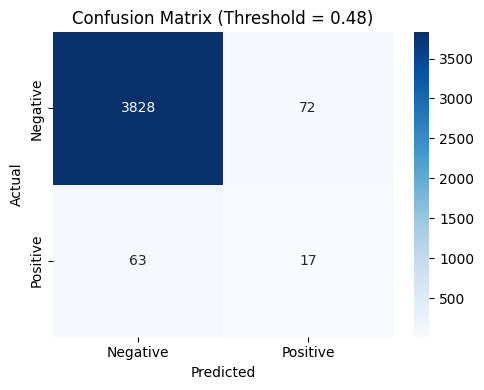

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 1. ÌôïÎ•† ÏòàÏ∏°
y_pred_prob = catboost_model.predict_proba(X_test)[:, 1]

# 2. Îã§ÏñëÌïú thresholdÏóêÏÑú F1 score Í≥ÑÏÇ∞
thresholds = np.linspace(0.1, 0.9, 50)
f1s = []

for t in thresholds:
    preds = (y_pred_prob >= t).astype(int)
    f1s.append(f1_score(y_test, preds))

# 3. ÏµúÏ†Å threshold
best_threshold = thresholds[np.argmax(f1s)]
best_f1 = max(f1s)

# 4. ÏµúÏ†Å thresholdÎ°ú ÏòàÏ∏°
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# 5. ÏÑ±Îä• Ï∂úÎ†•
print(f"‚úÖ ÏµúÏ†Å Threshold: {best_threshold:.2f}")
print(f"‚úÖ F1 Score (ÏµúÏ†Å threshold): {best_f1:.4f}")
print("‚úÖ Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# 6. Confusion Matrix ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {best_threshold:.2f})")
plt.tight_layout()
plt.show()

Feature importance

/tmp/ipykernel_28/273896562.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx[:10]], y=np.array(feature_names)[sorted_idx[:10]], palette="viridis")


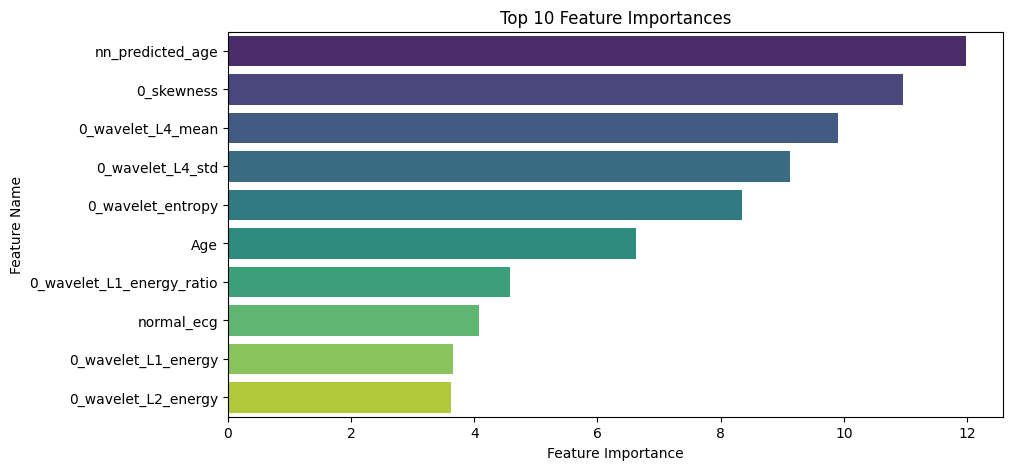

In [25]:
# feature importance
feature_names = df.drop(columns=["Chagas_label"]).columns.tolist()
plot_feature_importance(catboost_model, feature_names)

In [26]:
# Challenge score

from helper_code import compute_challenge_score  # helper_codeÏóêÏÑú Ìï®Ïàò Í∞ÄÏ†∏Ïò§Í∏∞

# Î™®Îç∏ ÏòàÏ∏°Í∞í (ÌôïÎ•† Í∏∞Î∞ò)
y_pred_prob = catboost_model.predict_proba(X_test)[:, 1]  # Î™®Îç∏Ïù¥ 1(ÏñëÏÑ±)Ïùº ÌôïÎ•† ÏòàÏ∏°

# Ïã§Ï†ú ÎùºÎ≤®
y_true = y_test  # Ïã§Ï†ú Ï†ïÎãµ Î†àÏù¥Î∏î (0 ÎòêÎäî 1)

# ‚úÖ Challenge Score Í≥ÑÏÇ∞
challenge_score = compute_challenge_score(y_true, y_pred_prob)

print(f"Challenge Score: {challenge_score:.3f}")


# Challenge Score: 0.390

Challenge Score: 0.312


ÏÉÅÍ¥ÄÍ≥ÑÏàò ÎÜíÏùÄ ÌîºÏ≤ò Ï†úÍ±∞

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def remove_highly_correlated_features(df, threshold=0.9):
    """
    ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä threshold Ïù¥ÏÉÅÏù∏ ÌîºÏ≤ò Ï§ë ÌïòÎÇòÎ•º Ï†úÍ±∞.
    
    Parameters:
    - df: ÏûÖÎ†• DataFrame (ÏàòÏπòÌòï ÌîºÏ≤òÎßå Ìè¨Ìï®Ìï¥Ïïº Ìï®)
    - threshold: ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Ï§Ä (default: 0.9)
    
    Returns:
    - Ï†úÍ±∞Îêú Ïª¨Îüº Î™©Î°ù
    - Ï†úÍ±∞ ÌõÑ DataFrame
    """
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨
    corr_matrix = df.corr().abs()

    # ÏÉÅÏÇºÍ∞ÅÌñâÎ†¨Îßå ÏÇ¨Ïö© (Ï§ëÎ≥µ Ï†úÍ±∞)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÌÅ∞ Ïª¨Îüº ÏåçÏóêÏÑú ÌïòÎÇòÏî© Ï†úÍ±∞
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"üîª ÏÉÅÍ¥ÄÍ≥ÑÏàò {threshold} Ï¥àÍ≥ºÎ°ú Ï†úÍ±∞Îêú ÌîºÏ≤ò Ïàò: {len(to_drop)}")
    return to_drop, df.drop(columns=to_drop)


def plot_correlation_heatmap(df, figsize=(16, 12), threshold=0.9):
    """
    ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî Ìï®Ïàò
    
    Parameters:
    - df: ÏàòÏπòÌòï ÌîºÏ≤òÎßå Ìè¨Ìï®Îêú DataFrame
    - figsize: ÌîåÎ°Ø ÌÅ¨Í∏∞ ÏÑ§Ï†ï
    - threshold: ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Ï§ÄÏÑ† (ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú ÌëúÏãú)
    """
    corr = df.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, fmt=".2f",
                cbar_kws={"shrink": 0.8}, square=True)
    plt.title("üìä Feature Correlation Heatmap", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Í∞ïÌïú ÏÉÅÍ¥Ä ÌîºÏ≤ò Ïåç Ï∂úÎ†•
    high_corr_pairs = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                pair = (corr.columns[i], corr.columns[j], corr.iloc[i, j])
                high_corr_pairs.append(pair)

    if high_corr_pairs:
        print(f"\nüîé ÏÉÅÍ¥ÄÍ≥ÑÏàò {threshold} Ï¥àÍ≥º ÌîºÏ≤òÏåç:")
        for feat1, feat2, corr_val in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"  {feat1} ‚Üî {feat2} : {corr_val:.2f}")
    else:
        print(f"\n‚úÖ ÏÉÅÍ¥ÄÍ≥ÑÏàò {threshold} Ï¥àÍ≥º ÌîºÏ≤òÏåç ÏóÜÏùå.")


/tmp/ipykernel_30/595258678.py:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


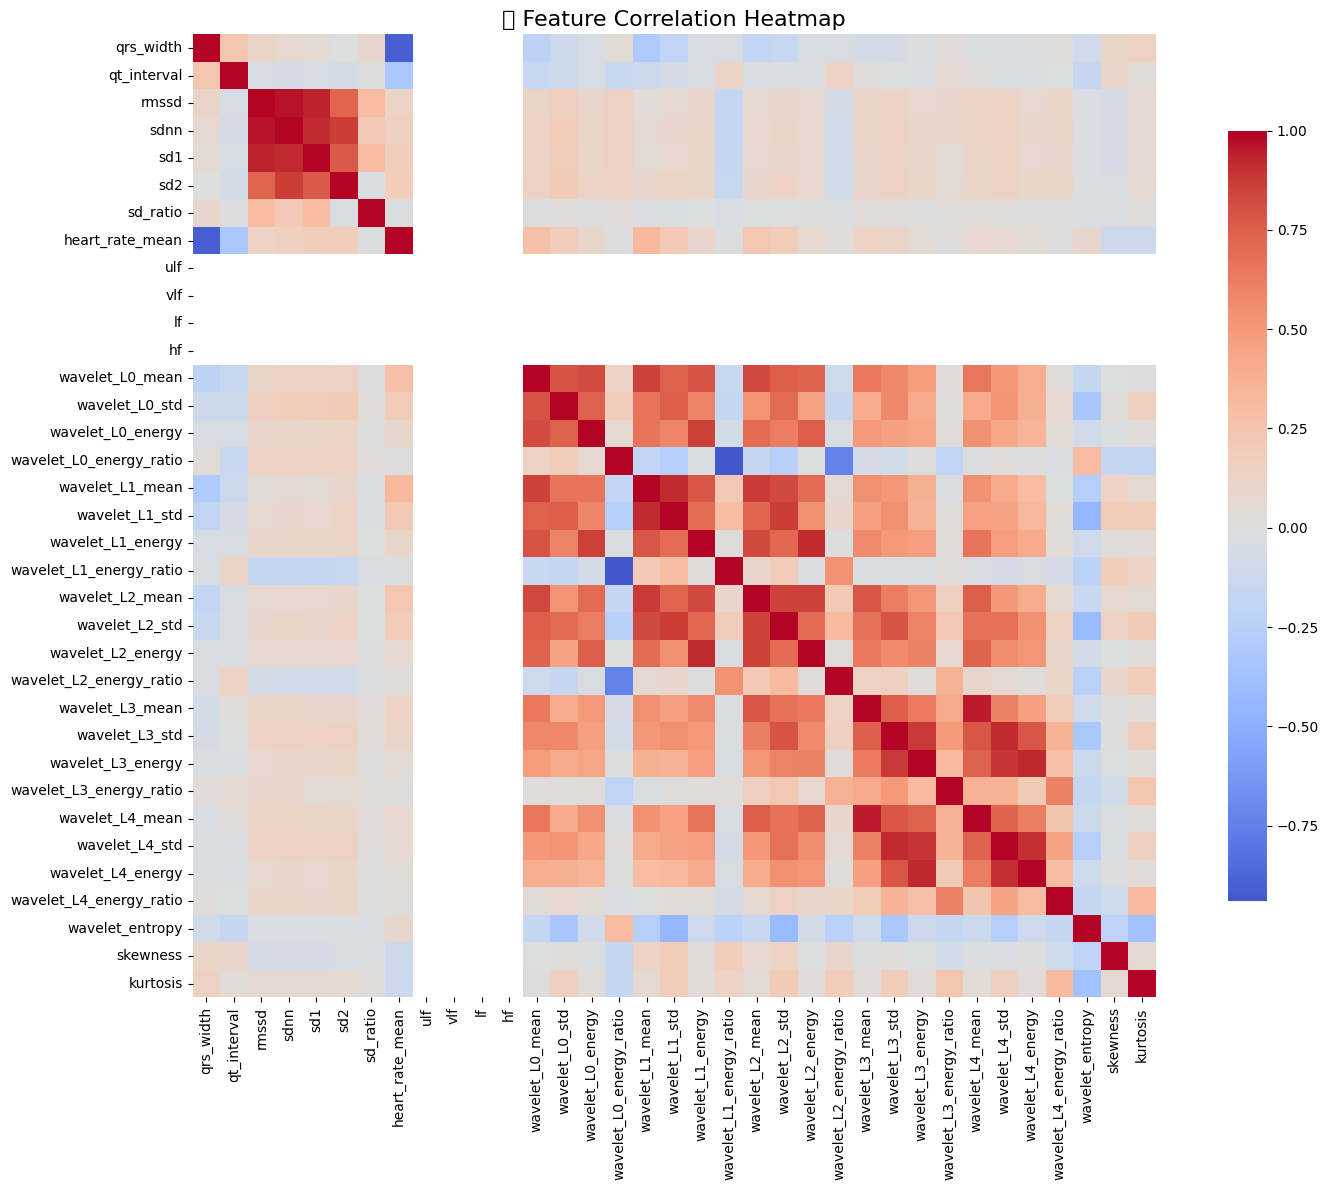


üîé ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.9 Ï¥àÍ≥º ÌîºÏ≤òÏåç:
  sdnn ‚Üî rmssd : 0.97
  wavelet_L4_mean ‚Üî wavelet_L3_mean : 0.95
  wavelet_L1_energy_ratio ‚Üî wavelet_L0_energy_ratio : -0.94
  sd1 ‚Üî rmssd : 0.94
  wavelet_L4_energy ‚Üî wavelet_L3_energy : 0.93
  wavelet_L1_std ‚Üî wavelet_L1_mean : 0.92
  wavelet_L4_std ‚Üî wavelet_L3_std : 0.92
  wavelet_L2_energy ‚Üî wavelet_L1_energy : 0.92
  sd1 ‚Üî sdnn : 0.92
  wavelet_L4_energy ‚Üî wavelet_L4_std : 0.91
  heart_rate_mean ‚Üî qrs_width : -0.91
üîª ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.9 Ï¥àÍ≥ºÎ°ú Ï†úÍ±∞Îêú ÌîºÏ≤ò Ïàò: 9


In [55]:
# X_numeric_scaledÎäî ndarrayÏù¥ÎØÄÎ°ú DataFrameÏúºÎ°ú Î≥ÄÌôò
X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)
plot_correlation_heatmap(X_numeric_df)

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∏∞Î∞ò Ï†úÍ±∞
dropped_cols, X_numeric_reduced = remove_highly_correlated_features(X_numeric_df)

# Îã§Ïãú Í≤∞Ìï©
X = np.hstack([X_numeric_reduced.values, X_categorical])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Í≥†Î†§
)

In [56]:
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_catboost, n_trials=10)

best_params_cat = study_cat.best_params
print("ÏµúÏ†Å CatBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", best_params_cat)

[I 2025-03-27 15:36:11,763] A new study created in memory with name: no-name-70706c89-1694-4de8-9aa1-f0019eb2a57a
/tmp/ipykernel_30/1075999890.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
/tmp/ipykernel_30/1075999890.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
/tmp/ipykernel_30/1075999890.py:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_temperature': trial.suggest_u

ÏµúÏ†Å CatBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 839, 'depth': 5, 'learning_rate': 0.12358475702840321, 'l2_leaf_reg': 0.026933434778883915, 'bagging_temperature': 0.981304905613334}


In [62]:
catboost_model = CatBoostClassifier(
                    **best_params_cat,
                    class_weights = [1, 10],
                    verbose=0)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)

# ‚úÖ 3. CatBoost Î™®Îç∏ ÌèâÍ∞Ä
y_pred_cat = catboost_model.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)

print(f"CatBoost Accuracy: {accuracy_cat:.4f}")
print(f"CatBoost F1 Score: {f1_cat:.4f}")

# Î≥ÑÎ°ú Ïú†ÏùòÎØ∏ÌïòÏßÑ ÏïäÏïòÎã§ ,,
# CatBoost Accuracy: 0.9719
# CatBoost F1 Score: 0.0968


CatBoost Accuracy: 0.9719
CatBoost F1 Score: 0.0968


## Î™®Îç∏ÎßÅ 2 > CNN

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ÏòàÏãú DataFrame Íµ¨Ï°∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò
# dfÏóêÎäî 'p_signal'Ïù¥ÎùºÎäî Ïó¥Ïù¥ ÏûàÍ≥†, Ïó¨Í∏∞Ïóê (samples, leads) ÌòïÌÉúÏùò numpy arrayÍ∞Ä ÏûàÏùå
# Ïòà: df.iloc[0]['p_signal'].shape = (4096, 12)

# ÏïÑÎûòÎäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï† Îïå Ïã§Ìñâ Í∞ÄÎä•Ìïú Íµ¨Ï°∞ÏûÖÎãàÎã§.

def append_signal_features(df, fs=400, lead_index=0, column_name='processed_signal'):
    """
    dfÏóêÏÑú ÏÑ†ÌÉùÌïú Î¶¨ÎìúÎßå ÎΩëÏïÑ Ï†ÑÏ≤òÎ¶¨Ìïú ÌõÑ, ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞ÄÌï®.
    
    Parameters:
        df (pd.DataFrame): p_signal Ïª¨ÎüºÏù¥ Ìè¨Ìï®Îêú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        fs (int): ÏÉòÌîåÎßÅ Ï£ºÌååÏàò
        lead_index (int): ÏÇ¨Ïö©Ìï† Î¶¨Îìú Ïù∏Îç±Ïä§
        column_name (str): Ï∂îÍ∞ÄÌï† Ïª¨ÎüºÎ™Ö
    
    Returns:
        pd.DataFrame: Ï†ÑÏ≤òÎ¶¨Îêú Ïã†Ìò∏Í∞Ä Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    from scipy.signal import butter, filtfilt
    import pywt
    import scipy.ndimage

    processed_signals = []
    for _, row in df.iterrows():
        signal = row['p_signal'][:, lead_index]
        processed = preprocess_ecg(signal)
        processed_signals.append(processed)

    df[column_name] = processed_signals
    return df

df = append_signal_features(df_part0)

/opt/conda/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/pywt/_thresholding.py:22: RuntimeWarning: invalid value encountered in divide
  thresholded = (1 - value/magnitude)


In [51]:
df.head()

exam_id                                           p_signal  Age  \
0  1398216  [[-1.601, 1.052, 2.652, 0.274, -2.127, 1.852, ...   35   
1   620215  [[0.518, 1.326, 0.808, -0.922, -0.145, 1.067, ...   19   
2   712938  [[1.837, 1.573, -0.264, -1.7, 1.055, 0.655, -1...   59   
3  1504935  [[-1.951, -4.063, -2.111, 3.011, 0.084, -3.087...   60   
4  1229800  [[0.195, -0.205, -0.401, 0.01, 0.303, -0.303, ...   58   

   Chagas_label  is_male  nn_predicted_age  RBBB  LBBB  AF  normal_ecg  \
0             0        0         50.454483     0     0   0           0   
1             0        0         28.217638     0     0   0           1   
2             0        0         67.447525     0     0   0           0   
3             0        0         64.676575     0     0   0           1   
4             0        0         66.523140     0     0   0           0   

                                    processed_signal  
0  [0.37955694292501285, 0.35929212733638505, 0.3...  
1  [0.0002714564730235519, 0.00018894121298737338...  
2  [1.6116500007338277, 1.2722895370536875, 0.974...  
3  [0.020984094904746262, 0.020051887560491262, 0...  
4  [0.2621720955106708, 0.20739520393993122, 0.16...

In [56]:
# ÏúÑÏïÑÎûòÎ°ú Ïù¥Ïñ¥ Î∂ôÏù¥Í∏∞ (row Î∞©Ìñ• concat)
df = pd.concat([df0, df['processed_signal']], axis=1)

df.head()

0_qrs_width  0_qt_interval   0_rmssd    0_sdnn     0_sd1     0_sd2  \
0     0.719167       0.460192  0.039765  0.023965  0.028096  0.020663   
1     1.089286       0.468750  0.183283  0.115463  0.128349  0.110663   
2     0.650000       0.465000  0.008073  0.007071  0.005428  0.005901   
3     0.936944       0.454750  0.022896  0.022135  0.016152  0.028661   
4     0.767813       0.464167  0.023414  0.027141  0.015199  0.029436   

   0_sd_ratio  0_heart_rate_mean  0_ulf  0_vlf  ...   Age  Chagas_label  \
0    1.359698          83.520850    0.0    0.0  ...  35.0           0.0   
1    1.159816          55.712566    0.0    0.0  ...  19.0           0.0   
2    0.919866          92.318824    0.0    0.0  ...  59.0           0.0   
3    0.563561          64.073928    0.0    0.0  ...  60.0           0.0   
4    0.516331          78.238343    0.0    0.0  ...  58.0           0.0   

   is_male  nn_predicted_age  RBBB  LBBB   AF  normal_ecg    Age_gap  \
0      0.0         50.454483   0.0   0.0  0.0         0.0 -15.454483   
1      0.0         28.217638   0.0   0.0  0.0         1.0  -9.217638   
2      0.0         67.447525   0.0   0.0  0.0         0.0  -8.447525   
3      0.0         64.676575   0.0   0.0  0.0         1.0  -4.676575   
4      0.0         66.523140   0.0   0.0  0.0         0.0  -8.523140   

                                    processed_signal  
0  [0.37955694292501285, 0.35929212733638505, 0.3...  
1  [0.0002714564730235519, 0.00018894121298737338...  
2  [1.6116500007338277, 1.2722895370536875, 0.974...  
3  [0.020984094904746262, 0.020051887560491262, 0...  
4  [0.2621720955106708, 0.20739520393993122, 0.16...  

[5 rows x 44 columns]

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, GlobalAveragePooling1D, Concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np

In [67]:
# 'Chagas_label' Í≤∞Ï∏°Í∞íÏù¥ ÏóÜÎäî ÌñâÎßå ÌïÑÌÑ∞ÎßÅ
df = df.dropna(subset=['Chagas_label', 'processed_signal'])

X_tabular = df.drop(columns=['Chagas_label', 'processed_signal']).values
y_label = df['Chagas_label'].values

# Î™®Îì† processed_signalÏùò Í∏∏Ïù¥ ÌôïÏù∏
signal_lengths = [len(s) for s in df['processed_signal']]
max_len = max(signal_lengths)  # ÎòêÎäî ÏõêÌïòÎäî Í∏∏Ïù¥ ÏÑ§Ï†ï Í∞ÄÎä•

# Zero-padding (Îí§Ïóê 0 Ï∂îÍ∞Ä)
X_signal_padded = pad_sequences(df['processed_signal'], maxlen=max_len, dtype='float32', padding='post', truncating='post')
X_signal = np.array(X_signal_padded)


# Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_tabular = scaler.fit_transform(X_tabular)

# Train/Test Split
X_tab_train, X_tab_test, X_sig_train, X_sig_test, y_train, y_test = train_test_split(
    X_tabular, X_signal, y_label, test_size=0.2, stratify=y_label, random_state=42)

In [69]:
# Î™®Îç∏ Ï†ïÏùò (tabularÏóêÎäî mlp, Ïã†Ìò∏ÏóêÎäî 1dcnn Ï†ÅÏö©)
from tensorflow.keras.losses import BinaryFocalCrossentropy  # ÏÉÅÎã® import ÌïÑÏöî

# Branch 1: Tabular (MLP)
tabular_input = Input(shape=(X_tabular.shape[1],), name='tabular_input')
x1 = Dense(64, activation='relu')(tabular_input)
x1 = Dropout(0.3)(x1)
x1 = Dense(32, activation='relu')(x1)

# Branch 2: 1D CNN on ECG signal
signal_input = Input(shape=(X_signal.shape[1], 1), name='signal_input')
x2 = Conv1D(32, kernel_size=5, activation='relu')(signal_input)
x2 = Conv1D(64, kernel_size=5, activation='relu')(x2)
x2 = GlobalAveragePooling1D()(x2)

# Concatenate
combined = Concatenate()([x1, x2])
x = Dense(64, activation='relu')(combined)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[tabular_input, signal_input], outputs=output)
model.compile(
    optimizer='adam',
    loss=BinaryFocalCrossentropy(gamma=2.0, alpha=0.25),  # facal loss
    metrics=['accuracy']
)

# Training
model.fit(
    [X_tab_train, X_sig_train[..., np.newaxis]], y_train,
    validation_data=([X_tab_test, X_sig_test[..., np.newaxis]], y_test),
    epochs=10,
    batch_size=64,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

# Evaluation
preds = model.predict([X_tab_test, X_sig_test[..., np.newaxis]])

Epoch 1/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 45ms/step - accuracy: 0.9545 - loss: 0.1535 - val_accuracy: 0.9799 - val_loss: 0.1167
Epoch 2/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 42ms/step - accuracy: 0.9815 - loss: 0.1069 - val_accuracy: 0.9799 - val_loss: 0.0835
Epoch 3/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 40ms/step - accuracy: 0.9799 - loss: 0.0778 - val_accuracy: 0.9799 - val_loss: 0.0635
Epoch 4/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 41ms/step - accuracy: 0.9802 - loss: 0.0598 - val_accuracy: 0.9799 - val_loss: 0.0511
Epoch 5/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 39ms/step - accuracy: 0.9807 - loss: 0.0485 - val_accuracy: 0.9799 - val_loss: 0.0433
Epoch 6/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 43ms/step - accuracy: 0.9804 - loss: 0.0417 - val_accuracy: 0.9799

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# ÌôïÎ•† ‚Üí Ïù¥ÏßÑ ÏòàÏ∏°Í∞í (0 or 1)
y_pred_binary = (preds > 0.5).astype(int)

# ÏßÄÌëú Í≥ÑÏÇ∞
print("üîπ Accuracy:", accuracy_score(y_test, y_pred_binary))
print("üîπ Precision:", precision_score(y_test, y_pred_binary))
print("üîπ Recall:", recall_score(y_test, y_pred_binary))   # = Sensitivity
print("üîπ F1-score:", f1_score(y_test, y_pred_binary))
print("üîπ ROC-AUC:", roc_auc_score(y_test, preds))

# ÌòºÎèô ÌñâÎ†¨
print("üîπ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))

üîπ Accuracy: 0.9798994974874372
üîπ Precision: 0.0
üîπ Recall: 0.0
üîπ F1-score: 0.0
üîπ ROC-AUC: 0.5
üîπ Confusion Matrix:
 [[3900    0]
 [  80    0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
from helper_code import compute_challenge_score

# y_test: ground-truth label Î∞∞Ïó¥
# preds: Î™®Îç∏ÏóêÏÑú ÎÇòÏò® ÌôïÎ•† ÏòàÏ∏°Í∞í

challenge_score = compute_challenge_score(y_test, preds)
print(f"Challenge Score (TPR@5%): {challenge_score:.4f}")

Challenge Score (TPR@5%): 0.0000


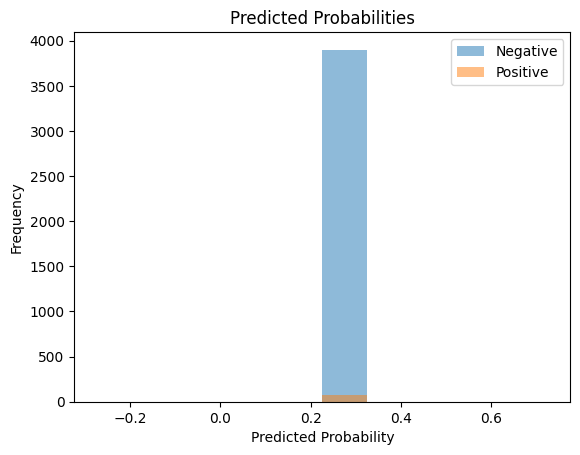

In [80]:
import matplotlib.pyplot as plt

plt.hist(preds[y_test == 0], bins=10, alpha=0.5, label='Negative')
plt.hist(preds[y_test == 1], bins=10, alpha=0.5, label='Positive')
plt.title('Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Î™®Îç∏ 3 > catboost + 1dcnn

In [83]:
from catboost import CatBoostClassifier

# ‚úÖ Î™®Îç∏ Ï†ïÏùò
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    class_weights=[1, 20],  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î≥¥Ï†ï
    verbose=0
)

catboost_model.fit(X_tab_train, y_train)
catboost_preds = catboost_model.predict_proba(X_tab_test)[:, 1]

In [73]:
# reshape
X_sig_train = X_sig_train[..., np.newaxis]
X_sig_test = X_sig_test[..., np.newaxis]

signal_input = Input(shape=(X_sig_train.shape[1], 1), name='signal_input')
x = Conv1D(32, kernel_size=5, activation='relu')(signal_input)
x = Conv1D(64, kernel_size=5, activation='relu')(x)
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

cnn_model = Model(inputs=signal_input, outputs=output)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(
    X_sig_train, y_train,
    validation_data=(X_sig_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

cnn_preds = cnn_model.predict(X_sig_test).ravel()

Epoch 1/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 44ms/step - accuracy: 0.9525 - loss: 0.3384 - val_accuracy: 0.9799 - val_loss: 0.6087
Epoch 2/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 42ms/step - accuracy: 0.9806 - loss: 0.5765 - val_accuracy: 0.9799 - val_loss: 0.4960
Epoch 3/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 30ms/step - accuracy: 0.9829 - loss: 0.4731 - val_accuracy: 0.9799 - val_loss: 0.4170
Epoch 4/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 30ms/step - accuracy: 0.9799 - loss: 0.4008 - val_accuracy: 0.9799 - val_loss: 0.3563
Epoch 5/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 41ms/step - accuracy: 0.9789 - loss: 0.3446 - val_accuracy: 0.9799 - val_loss: 0.3085
Epoch 6/20
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 40ms/step - accuracy: 0.9800 - loss: 0.2982 - val_accuracy: 0.9799 -

In [93]:

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf

# ‚úÖ Ï∞®Ïõê ÌôïÏù∏ ÌõÑ ÏûòÎ™ªÎêú Ï∞®Ïõê Ï†ïÎ¶¨
X_sig_train = np.array(X_sig_train)
X_sig_test = np.array(X_sig_test)

# ‚úÖ ÌïÑÏöîÌïòÎ©¥ squeeze
X_sig_train = np.squeeze(X_sig_train)
X_sig_test = np.squeeze(X_sig_test)

# ‚úÖ Ï†ïÌôïÌïú 3D shapeÏúºÎ°ú reshape: (batch_size, length, 1)
X_sig_train = X_sig_train.reshape((X_sig_train.shape[0], X_sig_train.shape[1], 1))
X_sig_test = X_sig_test.reshape((X_sig_test.shape[0], X_sig_test.shape[1], 1))


# === ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨: class_weight Í≥ÑÏÇ∞ ===
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# === Î™®Îç∏ Ï†ïÏùò ===
signal_input = Input(shape=(X_sig_train.shape[1], 1), name='signal_input')
x = Conv1D(32, kernel_size=5, activation='relu')(signal_input)
x = Conv1D(64, kernel_size=5, activation='relu')(x)
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

cnn_model = Model(inputs=signal_input, outputs=output)

cnn_model.compile(
    optimizer='adam',
    loss=BinaryFocalCrossentropy(gamma=2.0),  # focal loss Ï†ÅÏö©
    metrics=['accuracy']
)

# === Î™®Îç∏ ÌïôÏäµ ===
cnn_model.fit(
    X_sig_train, y_train,
    validation_data=(X_sig_test, y_test),
    epochs=10,
    batch_size=64,
    class_weight=class_weight_dict,  # class weight Ï†ÅÏö©
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

# === ÏòàÏ∏° Î∞è ÌèâÍ∞Ä ===
cnn_preds = cnn_model.predict(X_sig_test).ravel()
predicted_labels = (cnn_preds > 0.5).astype(int)

report = classification_report(y_test, predicted_labels, digits=4)
conf_matrix = confusion_matrix(y_test, predicted_labels)
roc_auc = roc_auc_score(y_test, cnn_preds)

(report, conf_matrix, roc_auc)

Epoch 1/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 44ms/step - accuracy: 0.7250 - loss: 0.1686 - val_accuracy: 0.0201 - val_loss: 0.1743
Epoch 2/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 42ms/step - accuracy: 0.1207 - loss: 0.1761 - val_accuracy: 0.9799 - val_loss: 0.1728
Epoch 3/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 41ms/step - accuracy: 0.5717 - loss: 0.1723 - val_accuracy: 0.0201 - val_loss: 0.1738
Epoch 4/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 42ms/step - accuracy: 0.4268 - loss: 0.1709 - val_accuracy: 0.9799 - val_loss: 0.1732
Epoch 5/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 42ms/step - accuracy: 0.6450 - loss: 0.1633 - val_accuracy: 0.9799 - val_loss: 0.1730
Epoch 6/10
249/249 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 41ms/step - accuracy: 0.1815 - loss: 0.1693 - val_accuracy: 0.0201

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


('              precision    recall  f1-score   support\n\n         0.0     0.9799    1.0000    0.9898      3900\n         1.0     0.0000    0.0000    0.0000        80\n\n    accuracy                         0.9799      3980\n   macro avg     0.4899    0.5000    0.4949      3980\nweighted avg     0.9602    0.9799    0.9700      3980\n',
 array([[3900,    0],
        [  80,    0]]),
 0.5)

In [94]:
# Îã®Ïàú ÌèâÍ∑† ÏïôÏÉÅÎ∏î
ensemble_preds = (catboost_preds + cnn_preds) / 2

In [96]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

def evaluate(y_true, y_pred_probs, name='Model'):
    y_pred_labels = (y_pred_probs >= 0.5).astype(int)
    print(f"\nüìä [{name}]")
    print(f"Accuracy     : {accuracy_score(y_true, y_pred_labels):.4f}")
    print(f"Precision    : {precision_score(y_true, y_pred_labels, zero_division=0):.4f}")
    print(f"Recall       : {recall_score(y_true, y_pred_labels):.4f}")
    print(f"F1-Score     : {f1_score(y_true, y_pred_labels, zero_division=0):.4f}")
    print(f"ROC AUC      : {roc_auc_score(y_true, y_pred_probs):.4f}")
    print(f"Confusion    :\n{confusion_matrix(y_true, y_pred_labels)}")


evaluate(y_test, catboost_preds, name="CatBoost")
evaluate(y_test, cnn_preds, name="1D CNN")
evaluate(y_test, ensemble_preds, name="CatBoost + CNN Ensemble")



üìä [CatBoost]
Accuracy     : 0.9754
Precision    : 0.2500
Recall       : 0.1125
F1-Score     : 0.1552
ROC AUC      : 0.7553
Confusion    :
[[3873   27]
 [  71    9]]

üìä [1D CNN]
Accuracy     : 0.9799
Precision    : 0.0000
Recall       : 0.0000
F1-Score     : 0.0000
ROC AUC      : 0.5000
Confusion    :
[[3900    0]
 [  80    0]]

üìä [CatBoost + CNN Ensemble]
Accuracy     : 0.9754
Precision    : 0.2500
Recall       : 0.1125
F1-Score     : 0.1552
ROC AUC      : 0.7553
Confusion    :
[[3873   27]
 [  71    9]]


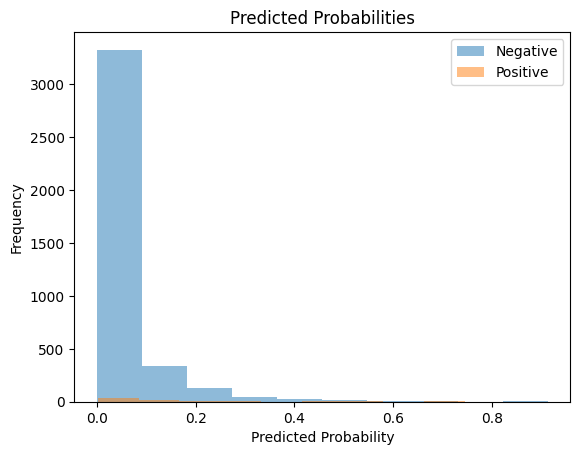

In [97]:
import matplotlib.pyplot as plt

plt.hist(catboost_preds[y_test == 0], bins=10, alpha=0.5, label='Negative')
plt.hist(catboost_preds[y_test == 1], bins=10, alpha=0.5, label='Positive')
plt.title('Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [101]:
from helper_code import compute_challenge_score

# y_test: ground-truth label Î∞∞Ïó¥
# preds: Î™®Îç∏ÏóêÏÑú ÎÇòÏò® ÌôïÎ•† ÏòàÏ∏°Í∞í

challenge_score = compute_challenge_score(y_test, ensemble_preds)
print(f"Challenge Score (TPR@5%): {challenge_score:.4f}")

Challenge Score (TPR@5%): 0.2375


In [106]:
from sklearn.linear_model import LogisticRegression

stacked_input = np.vstack([catboost_preds, cnn_preds]).T  # (n_samples, 2)
meta_model = CatBoostClassifier()
meta_model.fit(stacked_input, y_test) 
ensemble_preds = meta_model.predict_proba(stacked_input)[:, 1]

Learning rate set to 0.018582
0:	learn: 0.6552469	total: 6.42ms	remaining: 6.42s
1:	learn: 0.6206856	total: 12ms	remaining: 6.01s
2:	learn: 0.5881766	total: 17.6ms	remaining: 5.83s
3:	learn: 0.5564643	total: 22.6ms	remaining: 5.63s
4:	learn: 0.5275163	total: 27.9ms	remaining: 5.55s
5:	learn: 0.5000518	total: 32.5ms	remaining: 5.38s
6:	learn: 0.4739289	total: 36.5ms	remaining: 5.17s
7:	learn: 0.4502976	total: 39.2ms	remaining: 4.86s
8:	learn: 0.4276194	total: 42.9ms	remaining: 4.72s
9:	learn: 0.4065430	total: 46ms	remaining: 4.56s
10:	learn: 0.3873132	total: 48.3ms	remaining: 4.34s
11:	learn: 0.3691539	total: 51.5ms	remaining: 4.24s
12:	learn: 0.3521006	total: 54.3ms	remaining: 4.12s
13:	learn: 0.3363144	total: 57ms	remaining: 4.01s
14:	learn: 0.3214182	total: 59.7ms	remaining: 3.92s
15:	learn: 0.3074452	total: 62.2ms	remaining: 3.83s
16:	learn: 0.2945843	total: 64.7ms	remaining: 3.74s
17:	learn: 0.2821917	total: 67.1ms	remaining: 3.66s
18:	learn: 0.2713576	total: 68.9ms	remaining: 3.56

In [107]:
evaluate(y_test, ensemble_preds, name="CatBoost + CNN Ensemble + logistic")


üìä [CatBoost + CNN Ensemble + logistic]
Accuracy     : 0.9799
Precision    : 0.0000
Recall       : 0.0000
F1-Score     : 0.0000
ROC AUC      : 0.8985
Confusion    :
[[3900    0]
 [  80    0]]


In [109]:
catboost_labels = (catboost_preds > 0.5).astype(int)
cnn_labels = (cnn_preds > 0.5).astype(int)

# Îã§ÏàòÍ≤∞ (0 ÎòêÎäî 1)
ensemble_labels = (catboost_labels + cnn_labels >= 1).astype(int)
evaluate(y_test, ensemble_labels, name="CatBoost + CNN Ensemble > voting")


üìä [CatBoost + CNN Ensemble > voting]
Accuracy     : 0.9754
Precision    : 0.2500
Recall       : 0.1125
F1-Score     : 0.1552
ROC AUC      : 0.5528
Confusion    :
[[3873   27]
 [  71    9]]
